In [2]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
# Load dataset
df = pd.read_csv("student_data.csv")

In [4]:
# Features for clustering
X = df[["AttendanceRate", "StudyTime"]]

In [5]:
# Normalize the data (optional but improves clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [7]:
# Add cluster centers (rescale to original)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

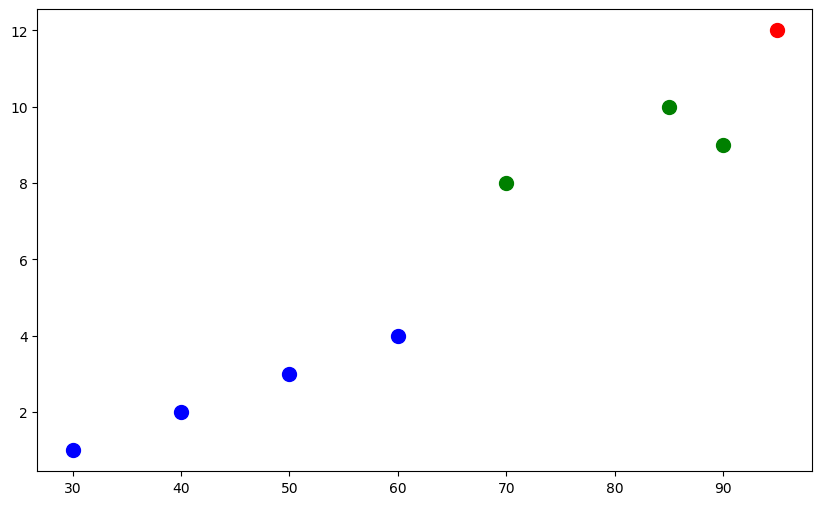

In [8]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster = df[df["Cluster"] == i]
    plt.scatter(cluster["AttendanceRate"], cluster["StudyTime"], 
                label=f"Cluster {i}", color=colors[i], s=100)

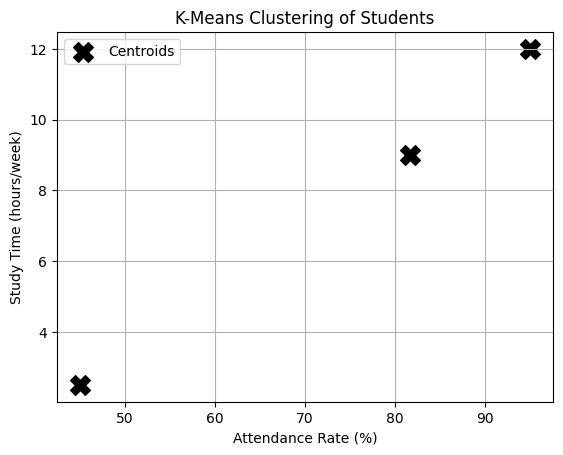

In [9]:
# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.xlabel("Attendance Rate (%)")
plt.ylabel("Study Time (hours/week)")
plt.title("K-Means Clustering of Students")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
#  Describe each cluster
print("\n🔍 Cluster Summary:")
for i in range(3):
    print(f"\nCluster {i}:\n", df[df["Cluster"] == i][["AttendanceRate", "StudyTime"]].describe())


 Cluster Summary:

Cluster 0:
        AttendanceRate  StudyTime
count             1.0        1.0
mean             95.0       12.0
std               NaN        NaN
min              95.0       12.0
25%              95.0       12.0
50%              95.0       12.0
75%              95.0       12.0
max              95.0       12.0

Cluster 1:
        AttendanceRate  StudyTime
count        4.000000   4.000000
mean        45.000000   2.500000
std         12.909944   1.290994
min         30.000000   1.000000
25%         37.500000   1.750000
50%         45.000000   2.500000
75%         52.500000   3.250000
max         60.000000   4.000000

Cluster 2:
        AttendanceRate  StudyTime
count        3.000000        3.0
mean        81.666667        9.0
std         10.408330        1.0
min         70.000000        8.0
25%         77.500000        8.5
50%         85.000000        9.0
75%         87.500000        9.5
max         90.000000       10.0
